In [1]:
from Functions import *
from select_lc import read_lc, select_lc
from savgol import savitzky_golay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import gzip
from astropy.io import fits
from scipy.interpolate import interp1d
from scipy.optimize import minimize
import pickle as pkl
from numpy import math
import traceback
import sys
from tqdm import tqdm

cmd_folder = os.path.realpath(os.getenv("SESNCFAlib"))

if cmd_folder not in sys.path:
     sys.path.insert(0, cmd_folder)
import templutils as templutils

%matplotlib inline

In [2]:
lc_direc = os.getenv("SESNPATH") + './../Somayeh_contributions/main/ELASTICC_lc/'

SNTYPES = ['Ib','IIb','Ic','Ic-bl', 'Ibn']

bands = ['R','V','r','g','U','u','J','B','H','I','i','K','m2','w1','w2']
colorTypes = {'IIb':'FireBrick',
             'Ib':'SteelBlue',
             'Ic':'DarkGreen',
             'Ic-bl':'DarkOrange',
             'Ibn':'purple'}

lsst_bands = {'0':'u',
              '1':'g',
              '2': 'r',
              '3': 'i',
              '4': 'z',
              '5': 'y'}

clrs =  {'0':'b',
              '1':'g',
              '2': 'r',
              '3': 'purple',
              '4': 'cyan',
              '5': 'k'}

su = templutils.setupvars()
coffset = su.coffset

In [3]:
# Reading in GP templates in any bands requested

tmpl = {}

bands = ['up', 'g', 'rp', 'ip']

for bb in bands:

    tmpl[bb[0]] = {}

    for SNTYPE in SNTYPES:
        
        tmpl[bb[0]][SNTYPE] = {}


        try:
            path = os.getenv("SESNPATH") + "maketemplates/outputs/GPs_2022/GPalltemplfit_%s_%s_V0.pkl"%(SNTYPE,bb)
            tmpl_ = pkl.load(open(path, "rb"))
        except:
            continue
        
#         print(tmpl_['rollingMedian'])

        if np.nansum(tmpl_['rollingMedian']) == 0:
            print(bb, SNTYPE)
            continue

        tmpl[bb[0]][SNTYPE] = tmpl_





Paths to where the Elasticc light curves are stored:

Paths to Ib's: 

    'ELASTICC_TRAIN_SNIb+HostXT_V19/'
    
    'ELASTICC_TRAIN_SNIb-Templates/'
    
Paths to Ic's:

    'ELASTICC_TRAIN_SNIc+HostXT_V19/'
    
    'ELASTICC_TRAIN_SNIc-Templates/'
    
Paths to Ic-bl's:

    'ELASTICC_TRAIN_SNIcBL-+HostXT_V19/'
    

In [53]:
lc_direc = os.getenv("SESNPATH") + './../Somayeh_contributions/main/ELASTICC_lc/'
dir_name = 'ELASTICC_TRAIN_SNIcBL-+HostXT_V19/'
directory = lc_direc + dir_name.split('/')[0] + '.pkl'

In [54]:
sne = pkl.load(open(directory, "rb"))

In [55]:
b = 'r'
data = sne[0][b]

x_peak = data['x_peak']
x = data['x']
y = data['y']
yerr = data['y']
m = data['m']
merr = data['merr']

mmax = np.min(m)

plt.plot(x - x_peak, mmax - m, '.')
# plt.plot(tt - x_peak, -m_func, '-')

KeyError: 'r'

(-4.0, 1.0)

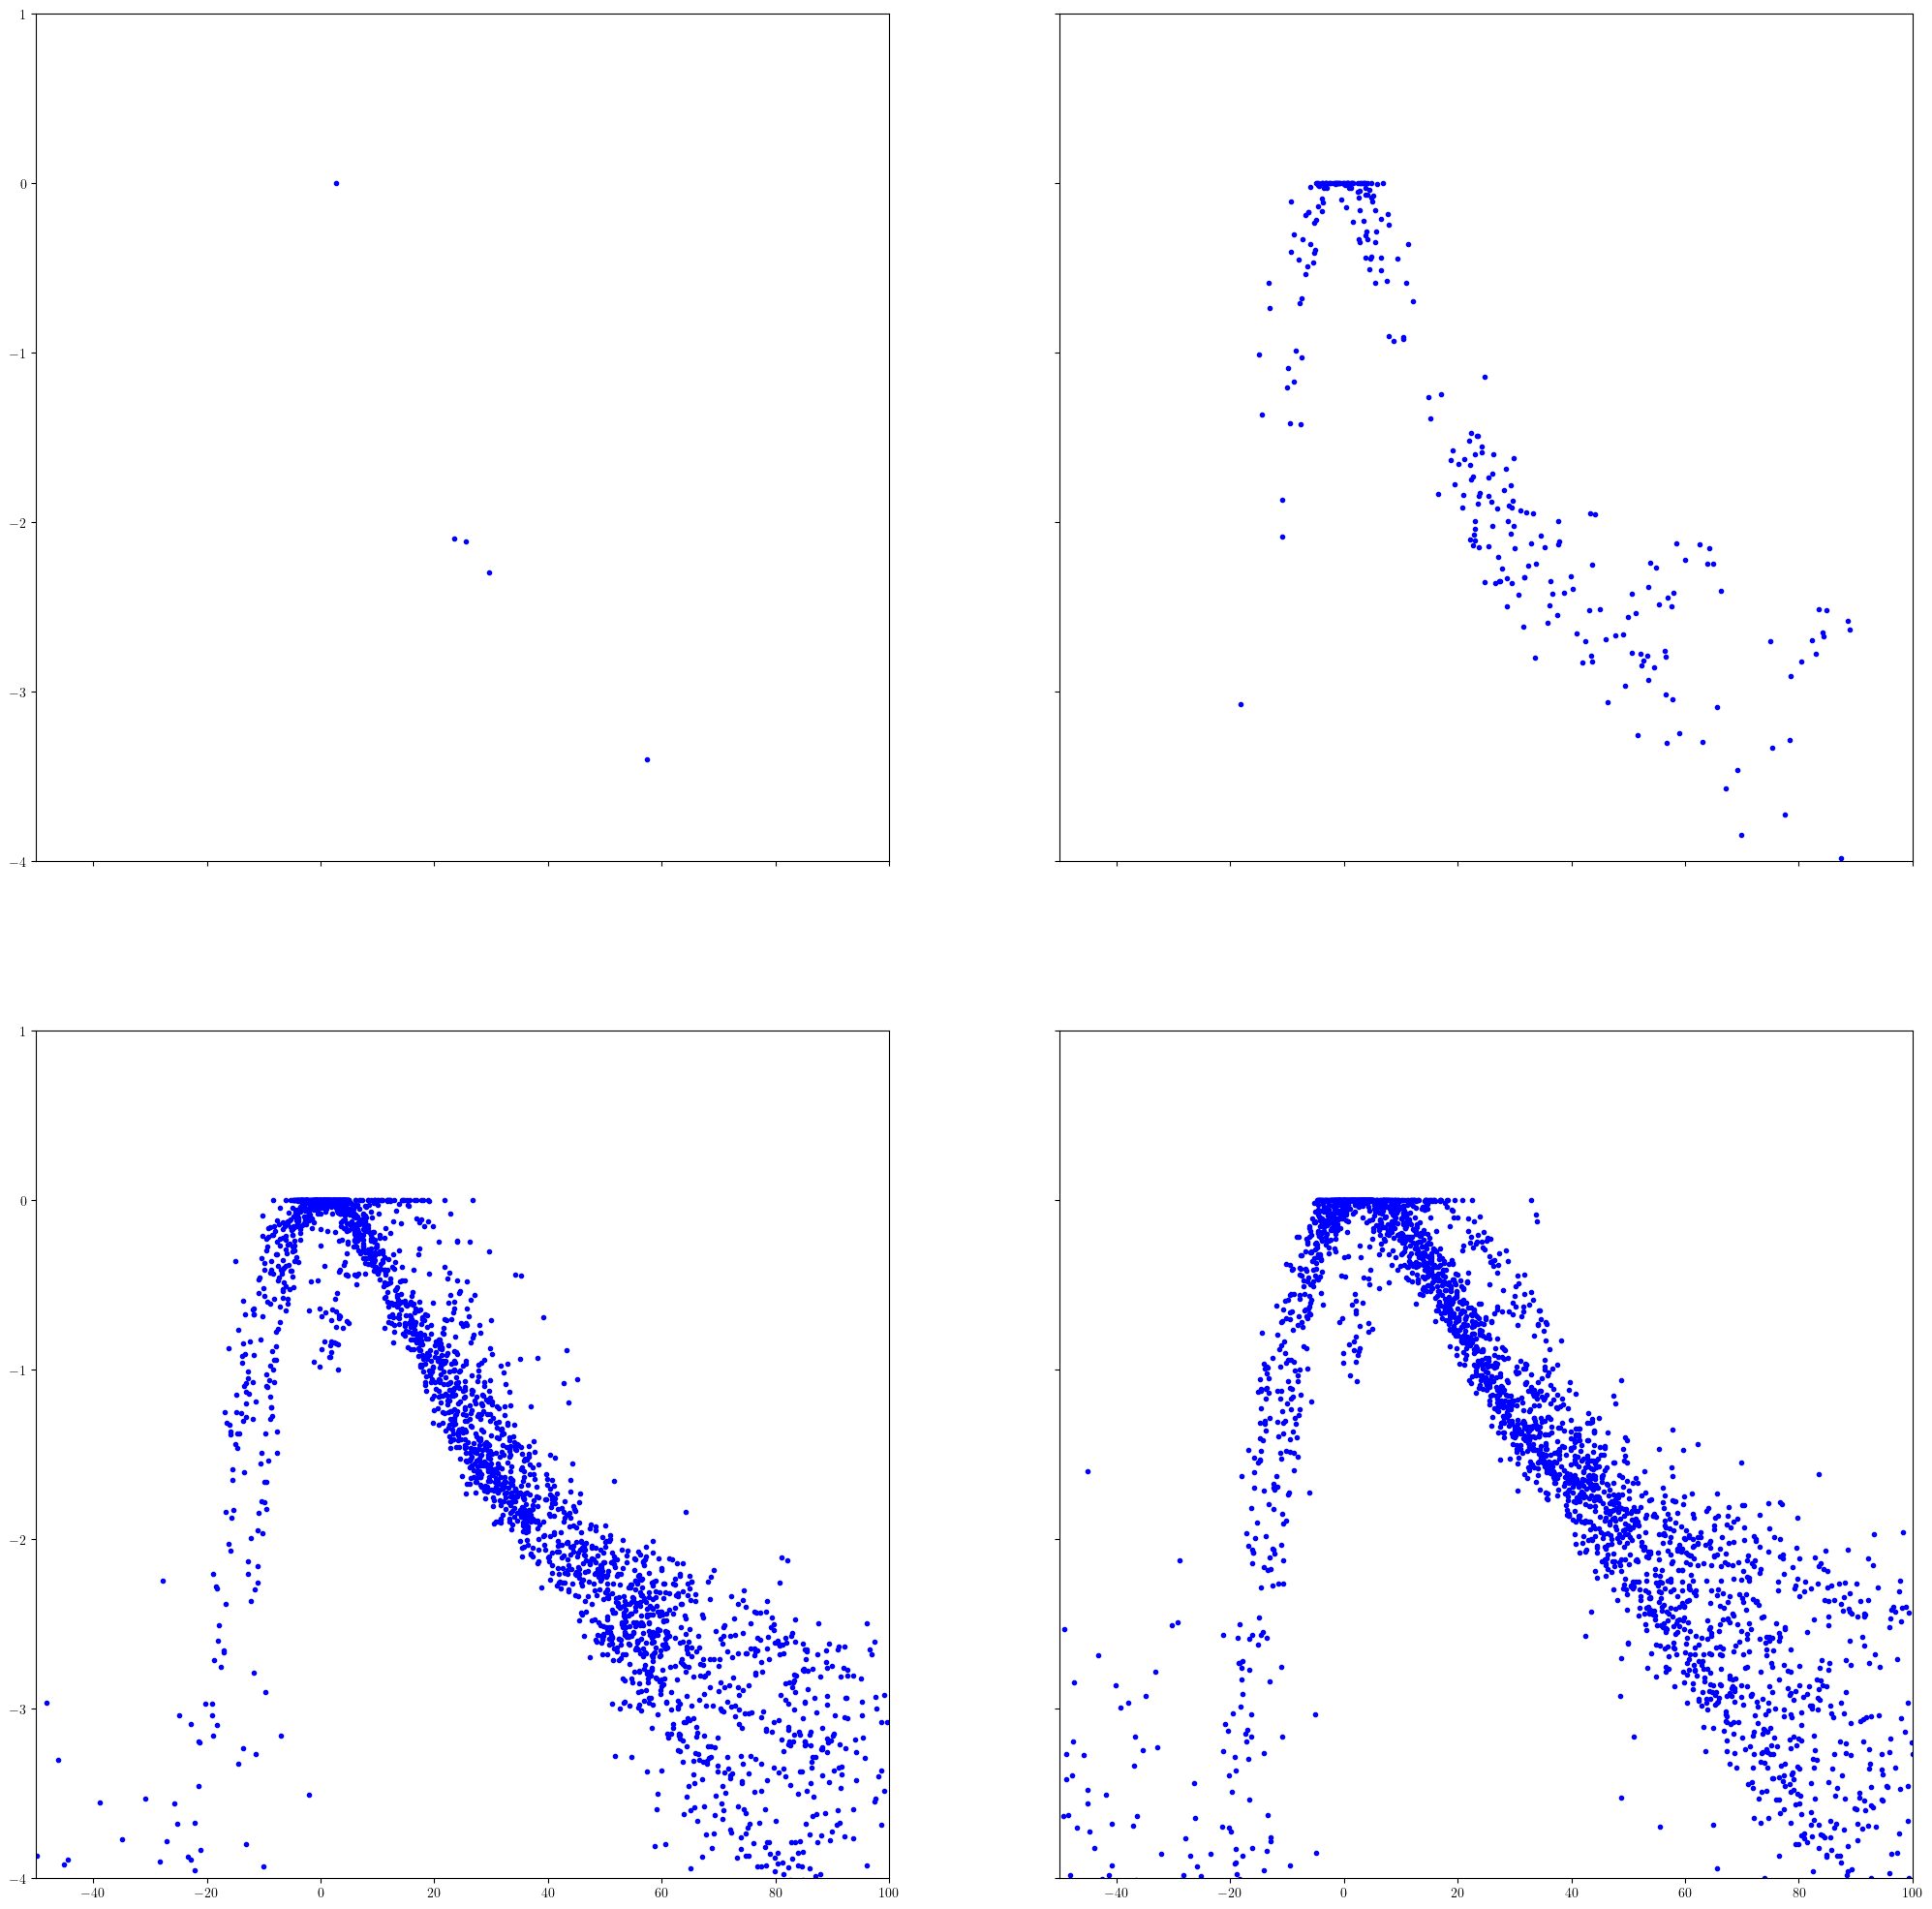

In [56]:
bb = ['u ', 'g ', 'r ', 'i ']
b_index = {'u':0,
           'g':1,
           'r':2,
           'i':3}

fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(25,25))

for j, key in enumerate(list(sne.keys())):
    data1 = sne[key]
    
    for b in data1.keys():
        
        data = data1[b]

        x_peak = data['x_peak']
        x = data['x']
        y = data['y']
        yerr = data['y']
        m = data['m']
        merr = data['merr']
        
        mmax = np.min(m)


        

        np.concatenate(ax)[b_index[b.strip()]].plot(x-x_peak, mmax - m , 'b.')
#             np.concatenate(ax)[b_index[b.strip()]].plot(tt-x_peak, mmax - m_func , 'k-', alpha = 0.2)

plt.xlim(-50, 100)
plt.ylim(-4, 1)


/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_15965/1342145388.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  np.concatenate(ax)[2].set_xticklabels(['', '-20', '-10','0', '10', '20','30', '40', '50', ''], size=30)
/var/folders/6f/k2kn3hn52ws4kc_w0_zqfpy40000gp/T/ipykernel_15965/1342145388.py:135: UserWarning: FixedFormatter should only be used together with FixedLocator
  np.concatenate(ax)[3].set_xticklabels(['', '-20','-10','0', '10', '20', '30', '40', '50', ''], size=30)


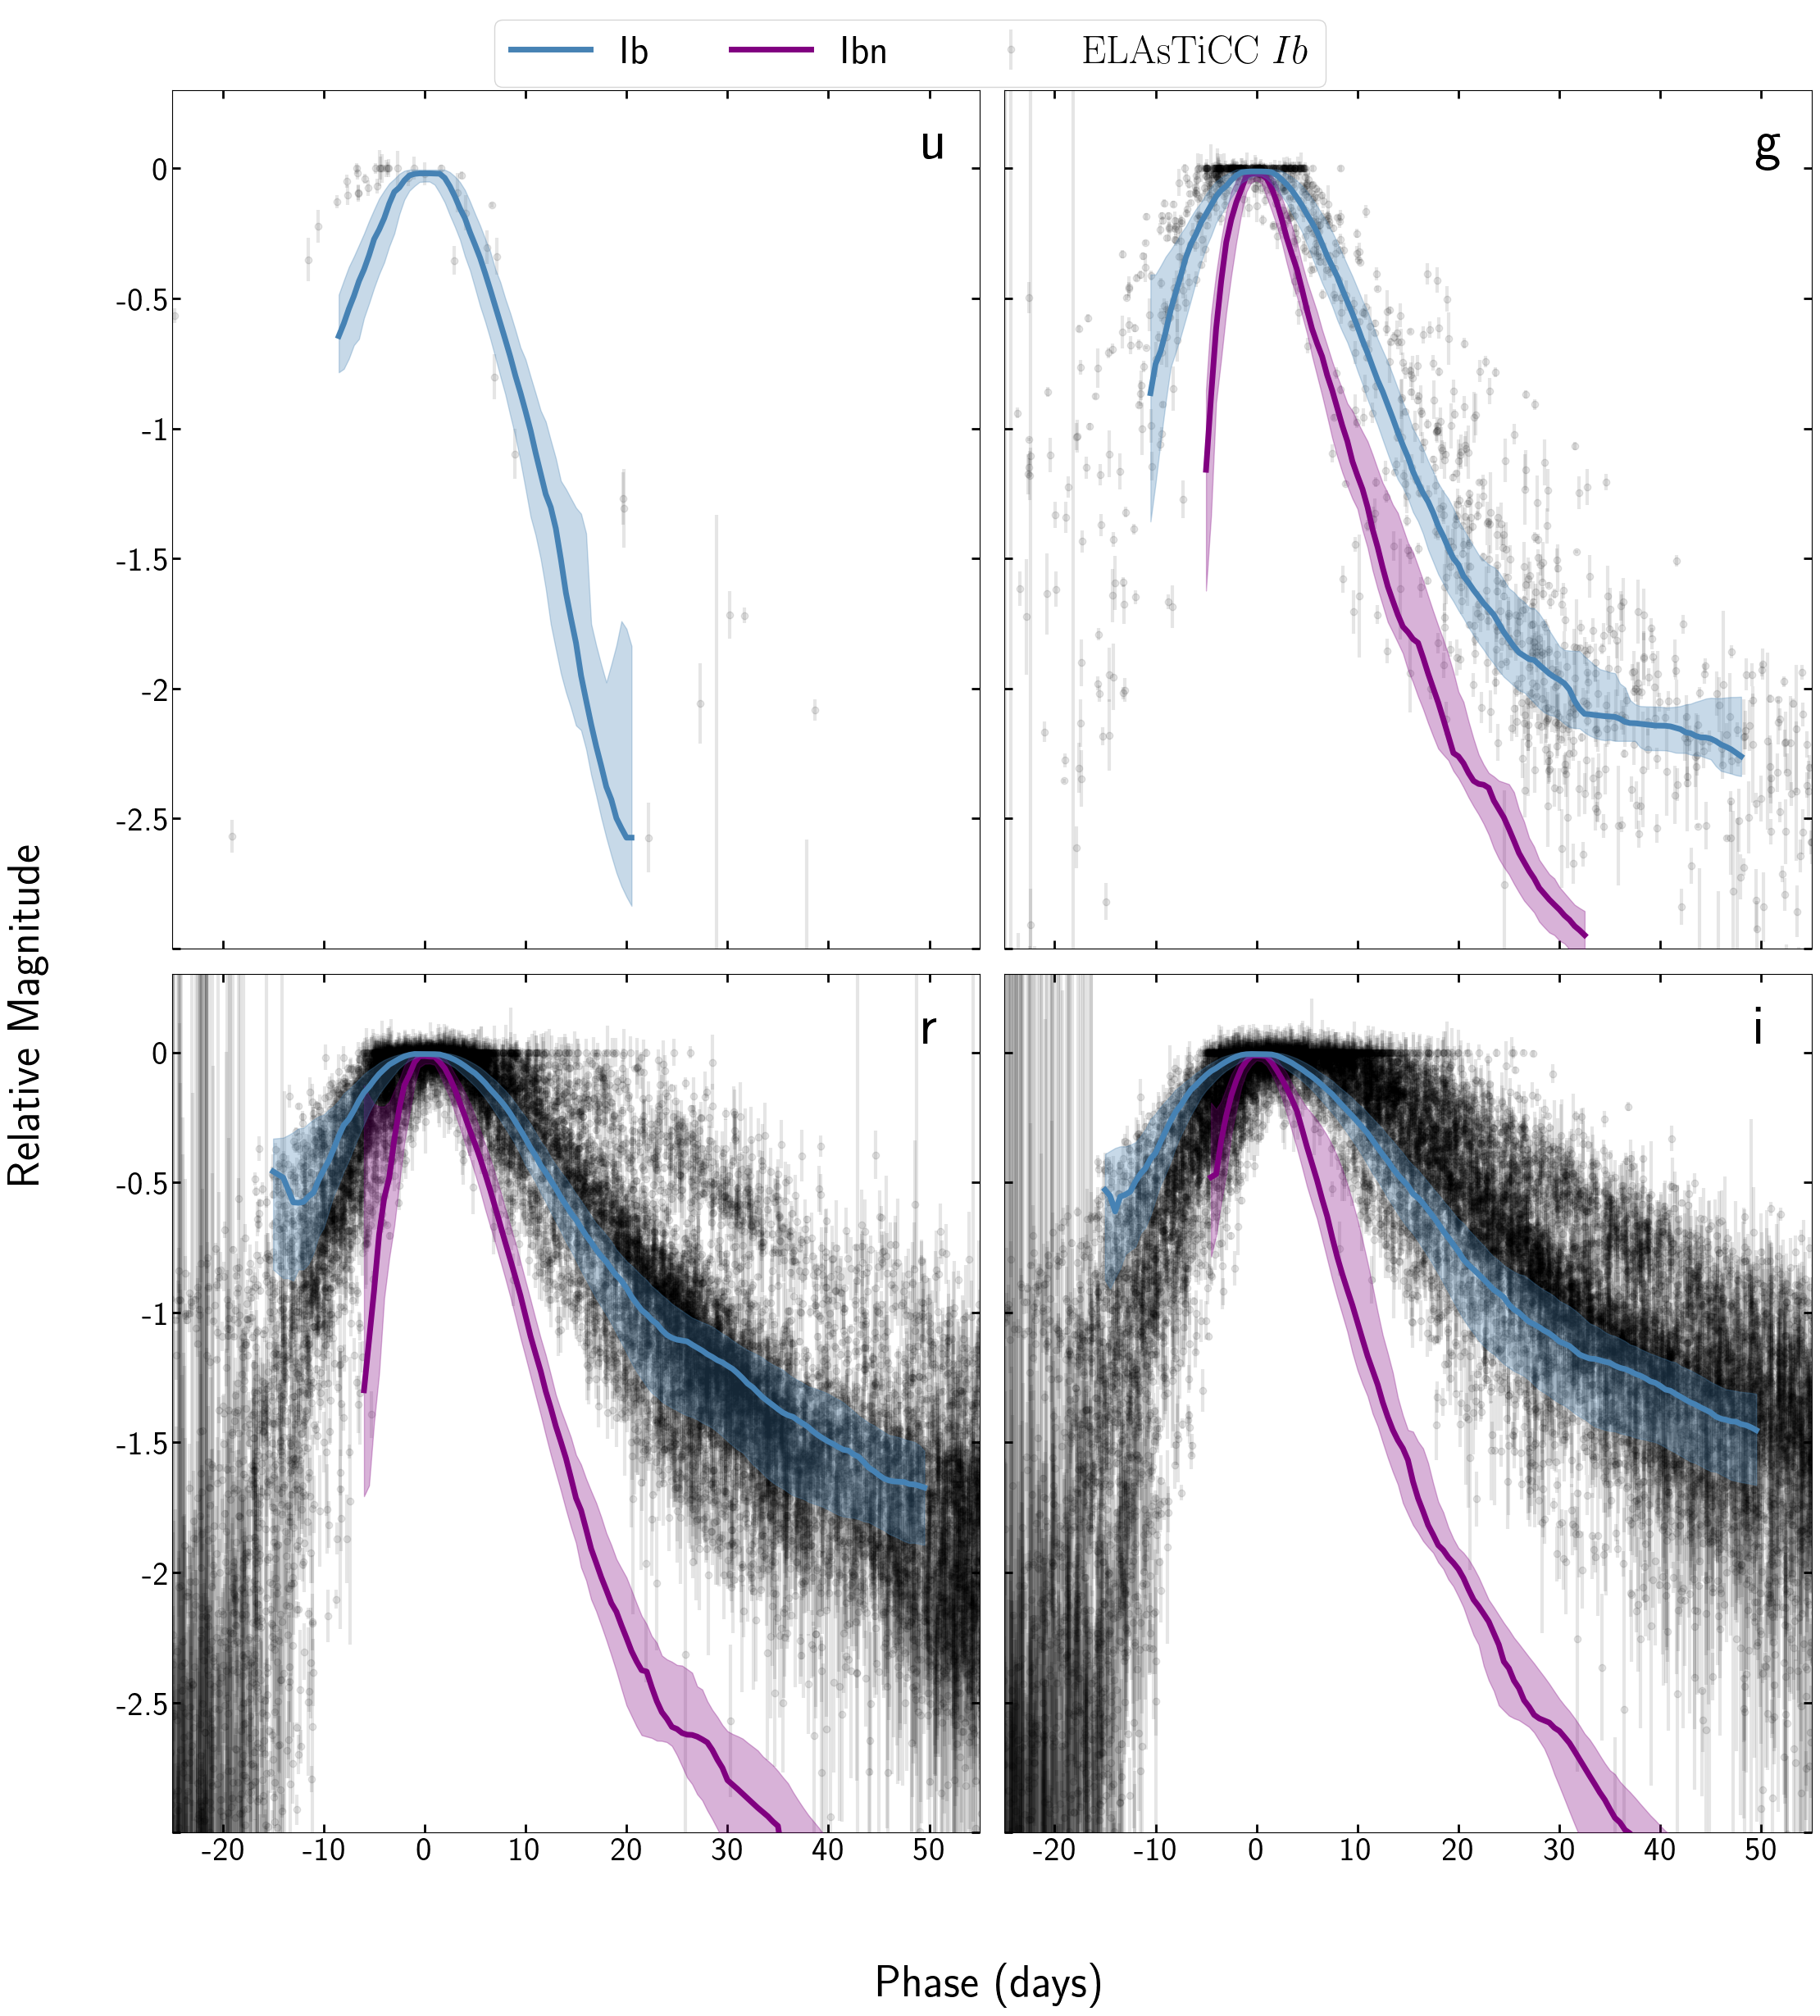

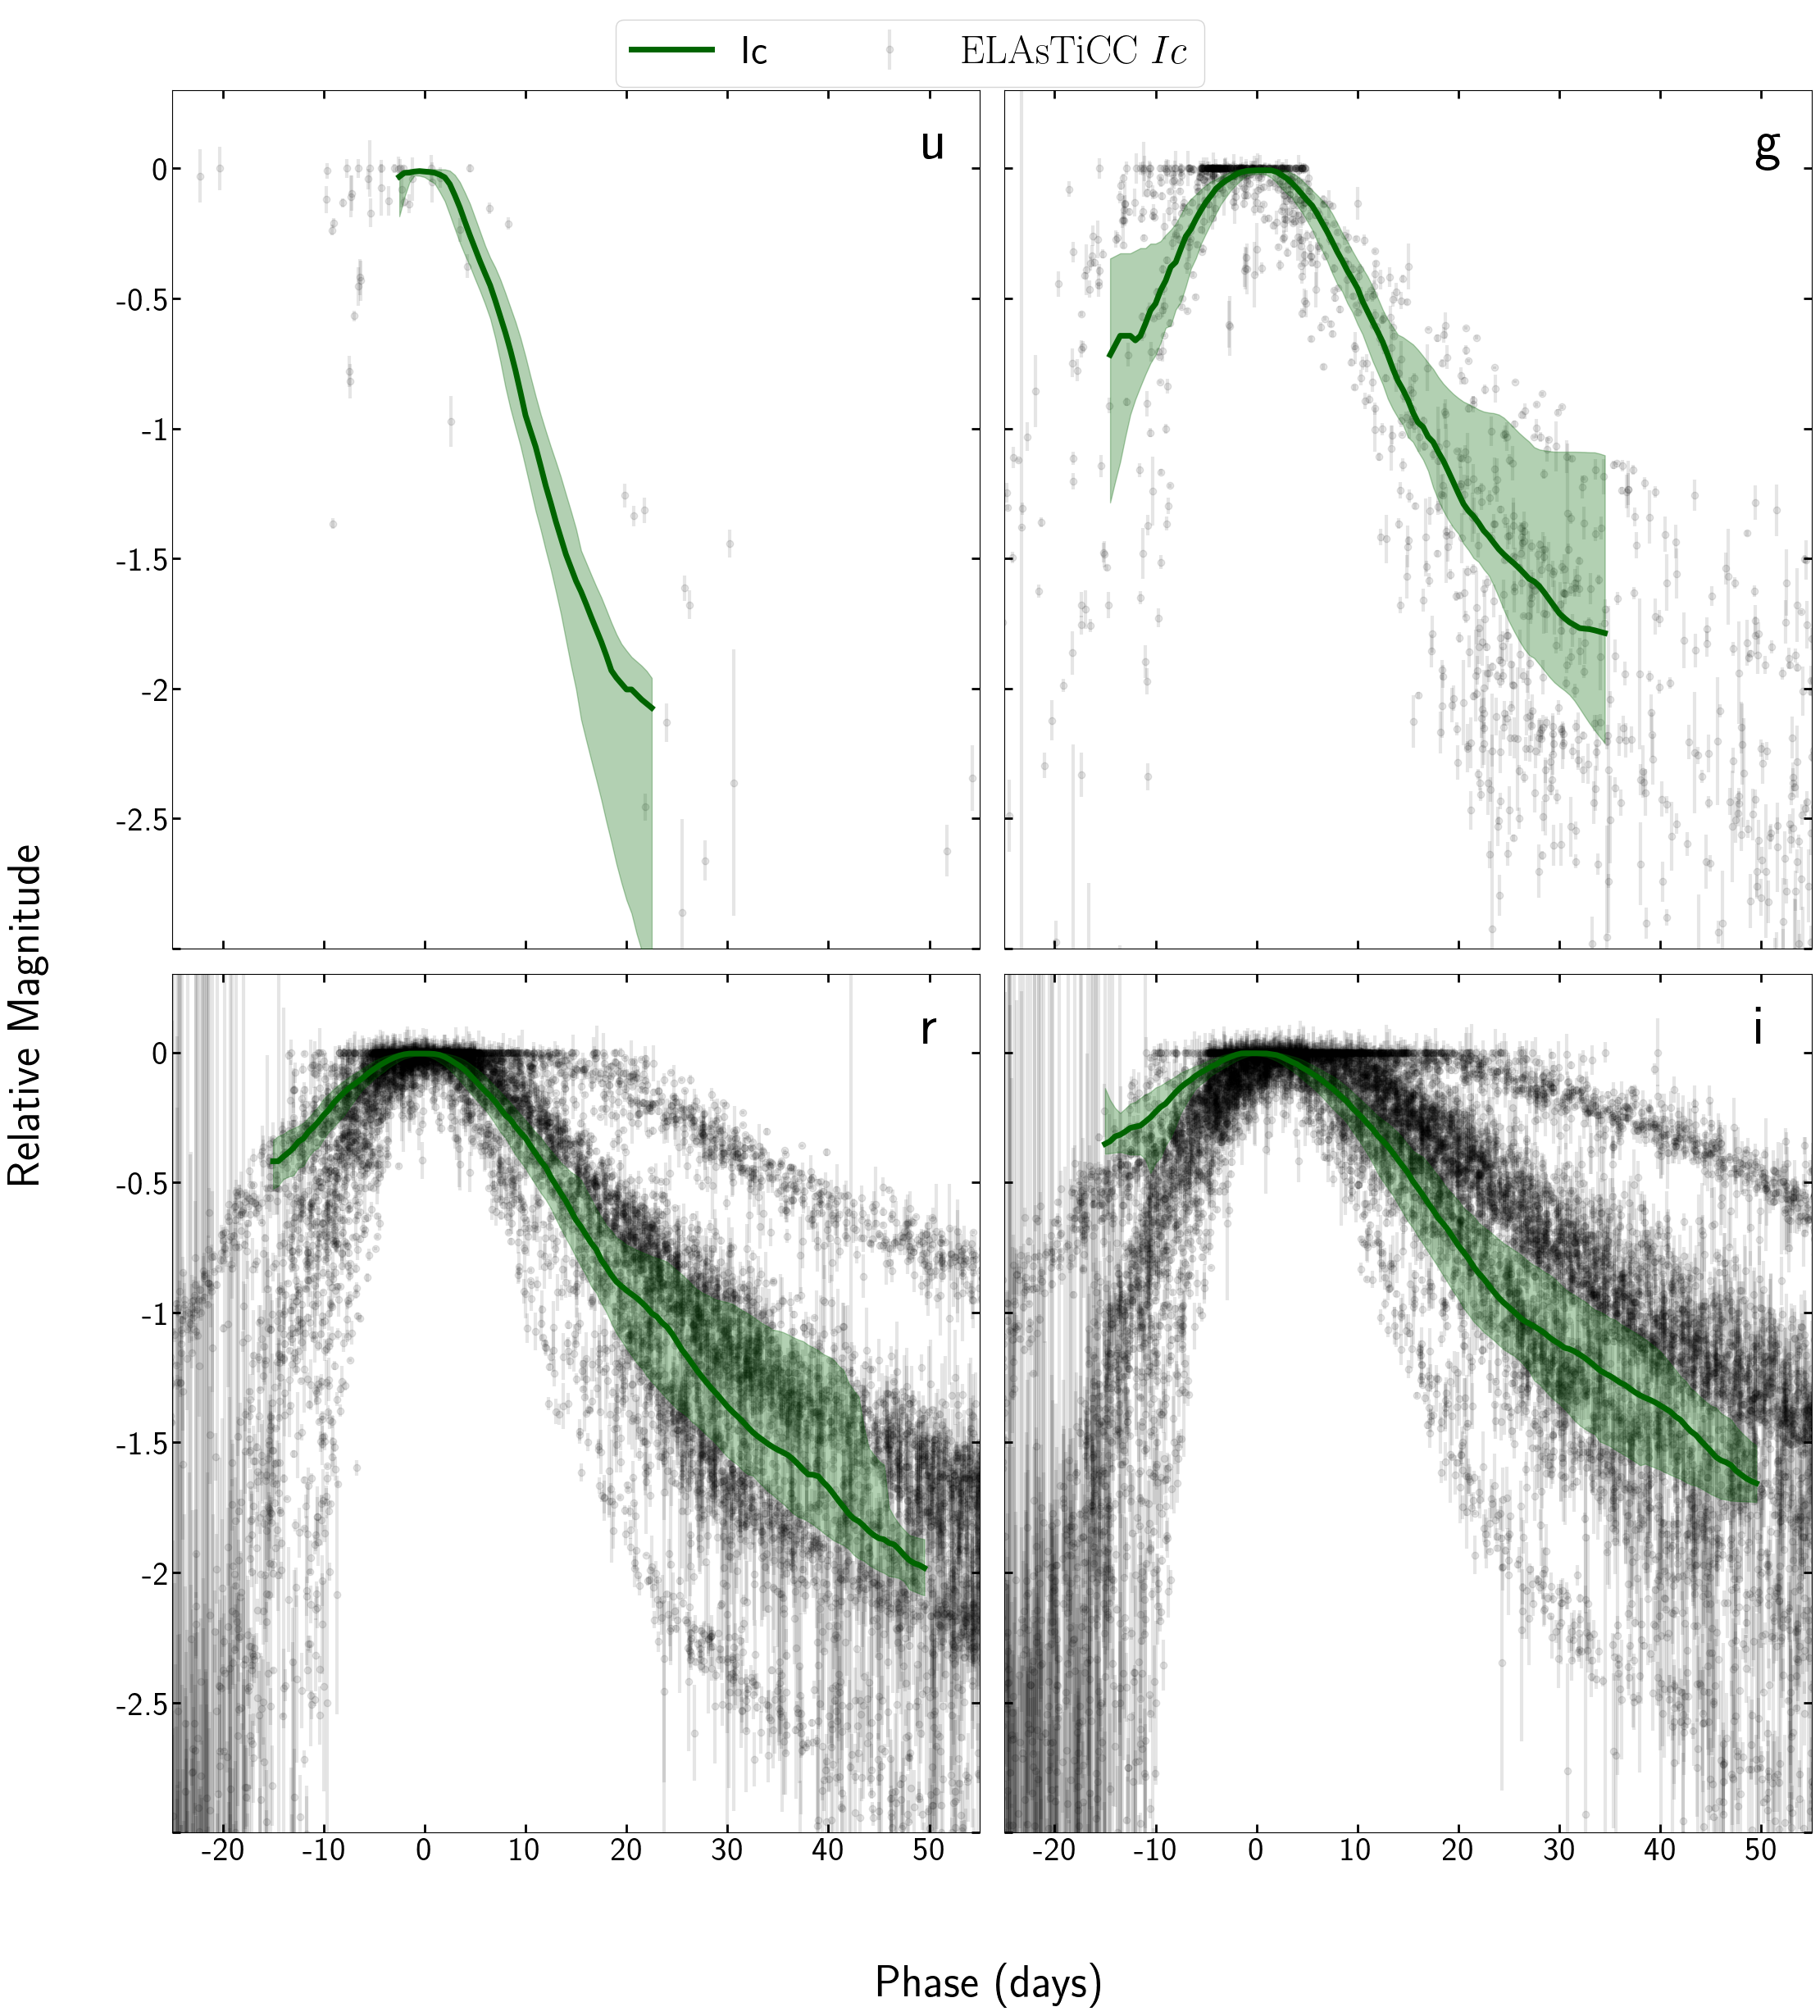

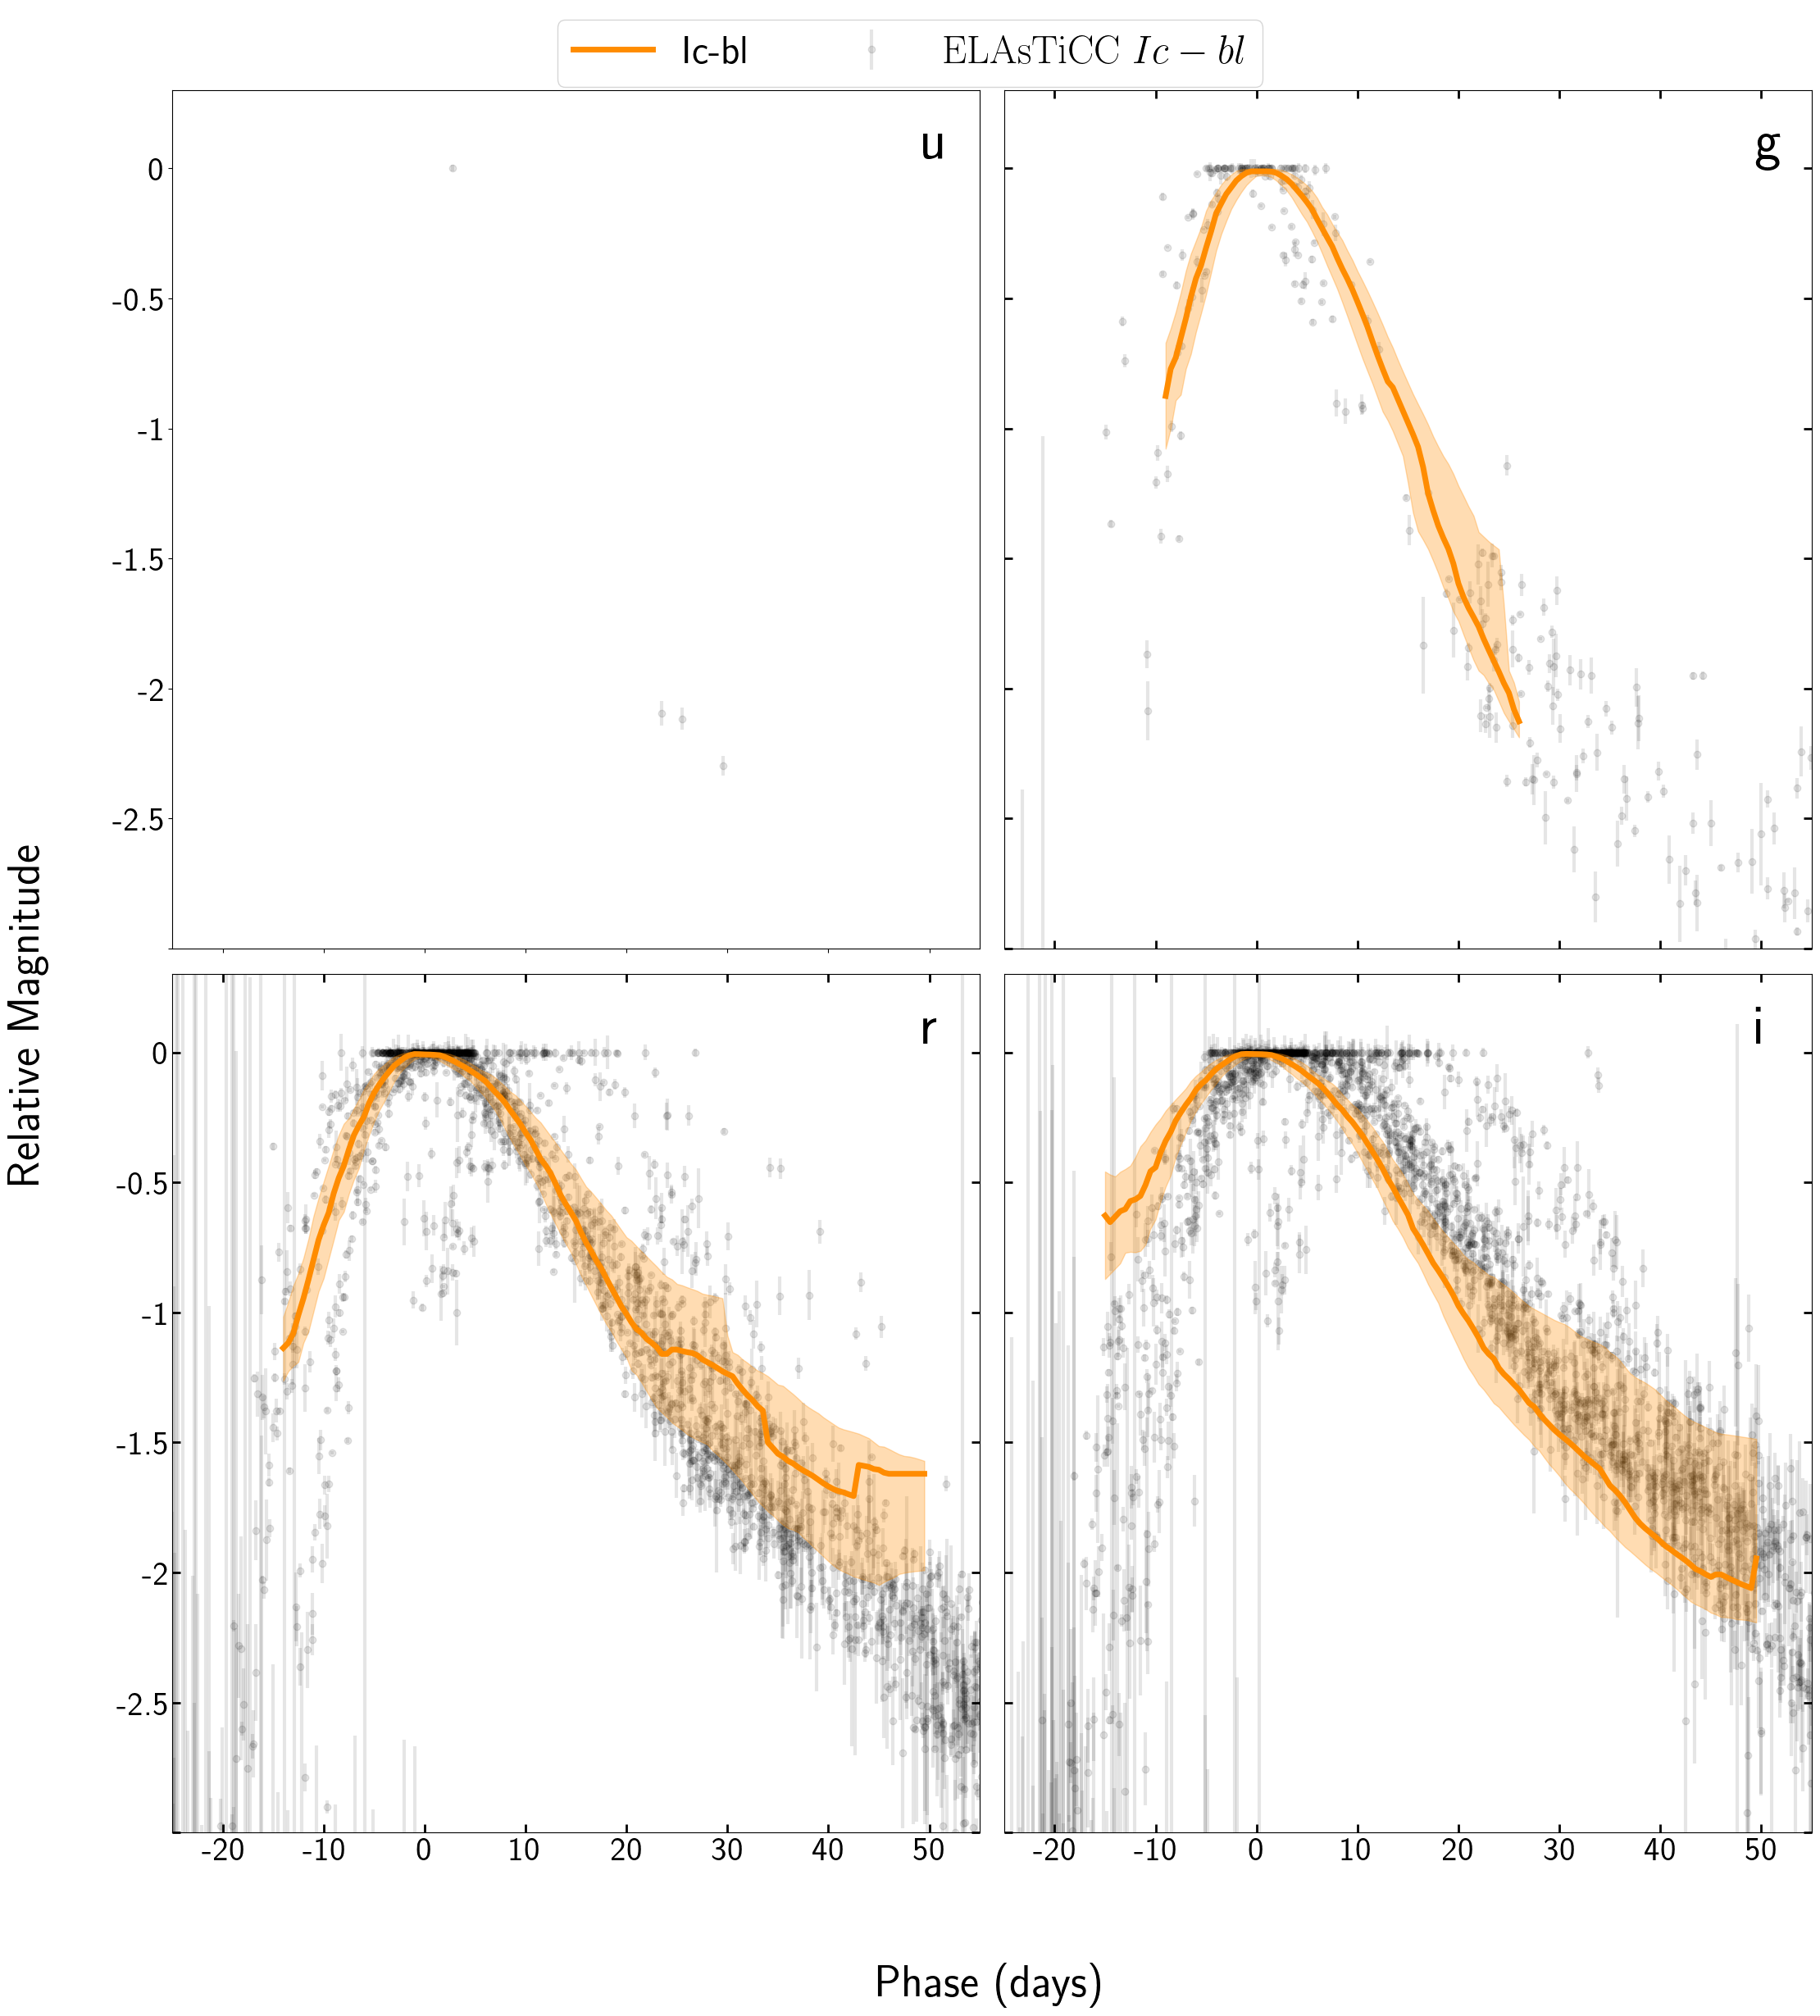

In [61]:
# ugrizy = 012345
bb = ['u','g','r','i']
b_ = [0,1,2,3]



# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
elasticc_sntype = {'Ib':['ELASTICC_TRAIN_SNIb+HostXT_V19/',
                         'ELASTICC_TRAIN_SNIb-Templates/'],
                   'Ic':['ELASTICC_TRAIN_SNIc+HostXT_V19/',
                         'ELASTICC_TRAIN_SNIc-Templates/'],
                   'Ic-bl':['ELASTICC_TRAIN_SNIcBL-+HostXT_V19/']}

SNTYPES_ = {'Ib':['Ib', 'Ibn'],
            'Ic':['Ic'],
            'Ic-bl':['Ic-bl']}

plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=r'\makeatletter \newcommand*{\rom}[1]{\expandafter\@slowromancap\romannumeral #1@} \makeatother'

# print(band_sntypes)

        
    
for sntype in list(elasticc_sntype.keys()):
    j_tmp = 0
    
    fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(25,25))
    
    for i, path in enumerate(elasticc_sntype[sntype]):
        
        
        directory = lc_direc + path.split('/')[0] + '.pkl'
        sne = pkl.load(open(directory, "rb"))
        
        for j, key in enumerate(list(sne.keys())):
            data1 = sne[key]

            for b in data1.keys():

                data = data1[b]

                x_peak = data['x_peak']
                x = data['x']
                y = data['y']
                yerr = data['y']
                m = data['m']
                merr = data['merr']

                mmax = np.min(m)


                if i == 0 and b == 'r' and j_tmp == 0:
                    j_tmp = 1
                    np.concatenate(ax)[b_index[b]].errorbar(x - x_peak,\
                        mmax - m , yerr=merr, fmt='o',\
                        linewidth = 3, color = 'k',
                        label = r'$\mathrm{ELAsTiCC }\;$'+'$'+sntype+'$', alpha = 0.1)
        #             np.concatenate(ax)[b_[j]].plot(t_new - new_t_peak,\
        #                 new_y_peak - m_func,\
        #                 '-', linewidth = 0.1, color = 'k', alpha = 0.1, label = 'VL fit')


                else:
                    np.concatenate(ax)[b_index[b]].errorbar(x - x_peak,\
                        mmax - m , yerr=merr, fmt='o',\
                        linewidth = 3, color = 'k', alpha = 0.1)
        #             np.concatenate(ax)[b_[j]].plot(t_new - new_t_peak,\
        #                 new_y_peak - m_func,\
        #                 '-', linewidth = 0.1, color = 'k', alpha = 0.1)


    for j, b in enumerate(bb):

        for tp in SNTYPES_[sntype]:

            if tp != sntype:
                alpha = 1
                zorder = 15
            else:
                alpha = 1
                zorder = 19

            if len(tmpl[b][tp]) == 0:
                continue

            if b == 'r':

                np.concatenate(ax)[b_[j]].plot(tmpl[b][tp]['t'],
                        tmpl[b][tp]['rollingMedian'],
                        '-',color = colorTypes[tp], alpha = alpha,
                        linewidth=5, zorder = zorder, label = tp)
                np.concatenate(ax)[b_[j]].fill_between(tmpl[b][tp]['t'],\
                        tmpl[b][tp]['rollingPc25'],\
                        tmpl[b][tp]['rollingPc75'],\
                        alpha = 0.3*alpha, color = colorTypes[tp], zorder = zorder)

            else:


                if b == 'g' and tp == 'Ic':

                    np.concatenate(ax)[b_[j]].plot(tmpl[b][tp]['t'][tmpl[b][tp]['t']<35],\
                            tmpl[b][tp]['rollingMedian'][tmpl[b][tp]['t']<35],'-', alpha = alpha,\
                            color = colorTypes[tp],linewidth=5, zorder = zorder)
                    np.concatenate(ax)[b_[j]].fill_between(tmpl[b][tp]['t'][tmpl[b][tp]['t']<35],\
                            tmpl[b][tp]['rollingPc25'][tmpl[b][tp]['t']<35],\
                            tmpl[b][tp]['rollingPc75'][tmpl[b][tp]['t']<35],\
                            alpha = 0.3*alpha, color = colorTypes[tp], zorder = zorder)
                else:
                    np.concatenate(ax)[b_[j]].plot(tmpl[b][tp]['t'],\
                            tmpl[b][tp]['rollingMedian'],'-', alpha = alpha,\
                            color = colorTypes[tp],linewidth=5, zorder = zorder)
                    np.concatenate(ax)[b_[j]].fill_between(tmpl[b][tp]['t'],\
                            tmpl[b][tp]['rollingPc25'],\
                            tmpl[b][tp]['rollingPc75'],\
                            alpha = 0.3*alpha, color = colorTypes[tp], zorder = zorder)

            np.concatenate(ax)[b_[j]].tick_params(axis="both", direction="in", which="major",\
                                                  right=True, top=True, size=7, labelsize=25, width = 2)

        np.concatenate(ax)[b_[j]].text(0.93, 0.92, b, transform=np.concatenate(ax)[b_[j]].transAxes,\
                                   weight='bold', size = 50, color = 'k')

    handles, labels = np.concatenate(ax)[2].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=3, prop={'size':35})
    np.concatenate(ax)[0].set_xlim(-25,55)
    np.concatenate(ax)[0].set_ylim(-3,0.3)
    np.concatenate(ax)[0].set_yticks([0, -0.5, -1, -1.5, -2, -2.5, -3])
    np.concatenate(ax)[0].set_yticklabels([ '0','-0.5',  '-1', '-1.5', '-2', '-2.5', ''], size=30)
    np.concatenate(ax)[2].set_yticklabels(['0','-0.5',  '-1', '-1.5', '-2', '-2.5', ''], size=30)

    np.concatenate(ax)[2].set_xticklabels(['', '-20', '-10','0', '10', '20','30', '40', '50', ''], size=30)
    np.concatenate(ax)[3].set_xticklabels(['', '-20','-10','0', '10', '20', '30', '40', '50', ''], size=30)



    plt.subplots_adjust(hspace=.03, wspace=0.03, top = 0.95, left = 0.1, bottom = 0.1)

    fig.text(0.5, 0.02, 'Phase (days)', ha='center', size = 40)
    fig.text(0.02, 0.5, 'Relative Magnitude', va='center', rotation='vertical', size = 40)


    plt.savefig('Elasticc_lc_type_'+ sntype + '.pdf',
                bbox_inches='tight')